# Malignant Comments Classifier Project

## Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("malignant_train.csv")

In [4]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Columns:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.

Highly Malignant: It denotes comments that are highly malignant and hurtful.

Rude: It denotes comments that are very rude and offensive.

Threat: It contains indication of the comments that are giving any threat to someone.

Abuse: It is for comments that are abusive in nature.

Loathe: It describes the comments which are hateful and loathing in nature.

ID: It includes unique Ids associated with each comment text given.

Comment text: This column contains the comments extracted from various social media platforms.

# Exploratory Data Analysis (EDA):

In [5]:
df.shape

(159571, 8)

In [6]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [9]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

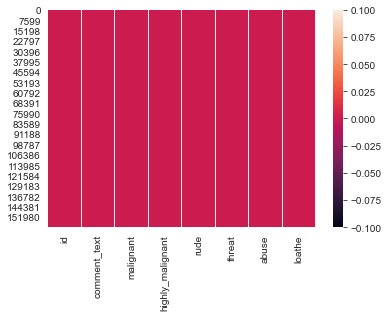

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dropping "Id" column from train dataset since it is not required

In [12]:
df.drop('id',axis=1,inplace=True)

In [13]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [14]:
df.shape

(159571, 7)

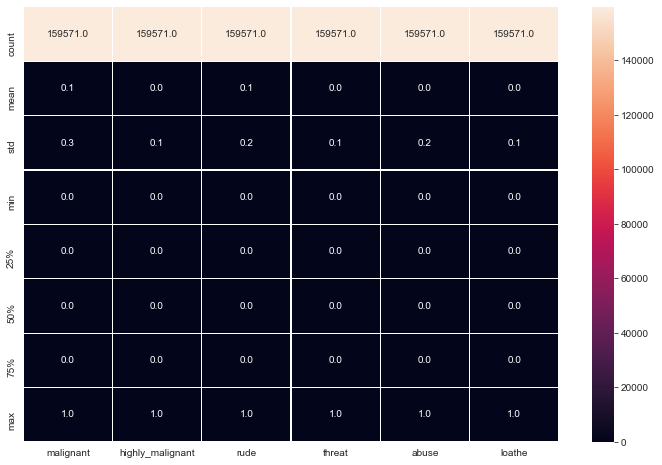

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Analyzing the Columns:

In [16]:
df['malignant'].unique()

array([0, 1], dtype=int64)

In [17]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

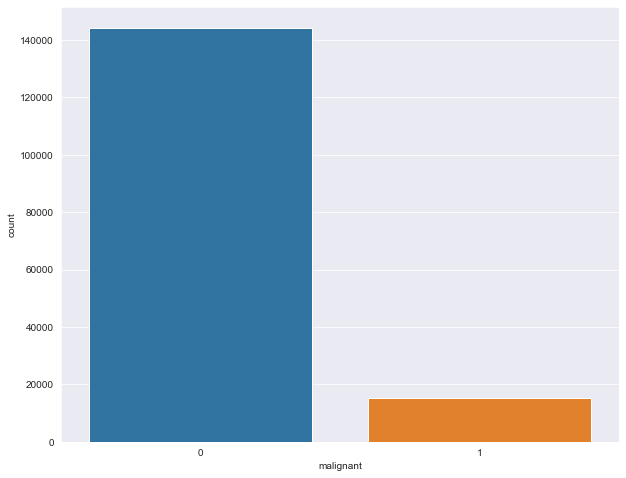

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df['malignant'])
plt.show()

In [19]:
df['highly_malignant'].unique()

array([0, 1], dtype=int64)

In [20]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

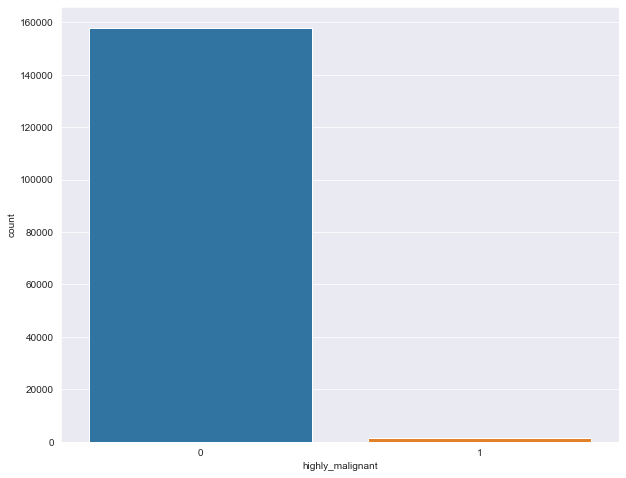

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(df['highly_malignant'])
plt.show()

In [22]:
df['rude'].unique()

array([0, 1], dtype=int64)

In [23]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

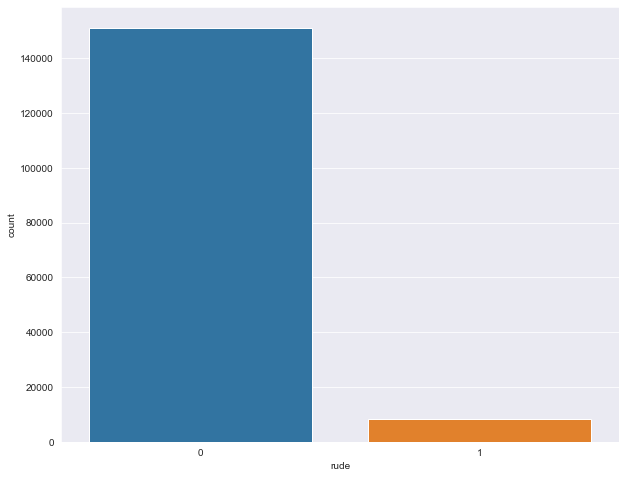

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(df['rude'])
plt.show()

In [25]:
df['threat'].unique()

array([0, 1], dtype=int64)

In [26]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

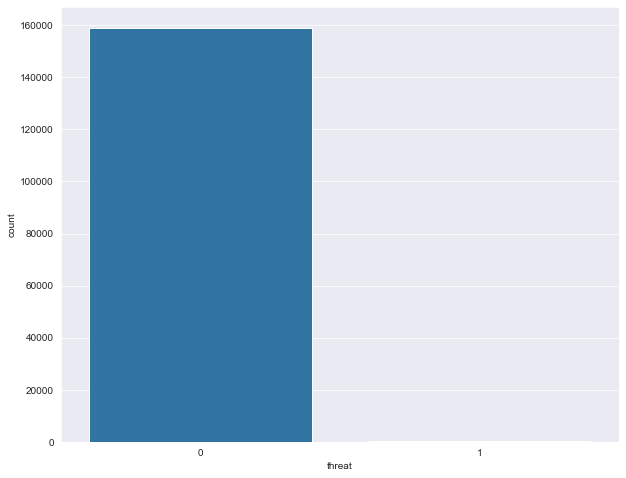

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(df['threat'])
plt.show()

In [28]:
df['abuse'].unique()

array([0, 1], dtype=int64)

In [29]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

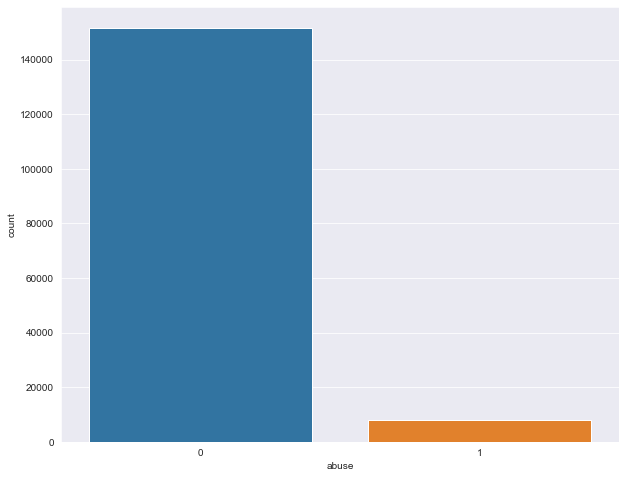

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(df['abuse'])
plt.show()

In [31]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

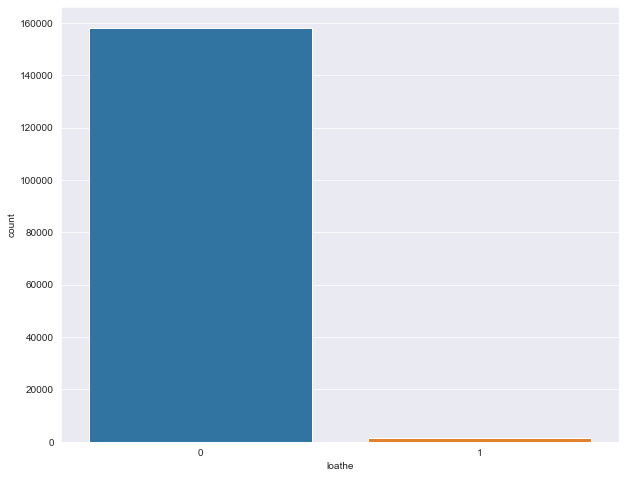

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(df['loathe'])
plt.show()

# Data Cleaning:

In [33]:
df['comment_text'].value_counts()

It must be a confusion with Schengen, which unified European policy concerning security matters.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [34]:
# Convert all messages to lower case
df['comment_text'] = df['comment_text'].str.lower()

In [35]:
# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [36]:
# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [37]:
# Replace money symbols with 'moneysymb' \
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollars')

In [38]:
# Replacing 10 digit phone numbers with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [39]:
# Replace numbers with 'num'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?','num')

In [40]:
#removing punctuations
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]',' ')

In [41]:
#removing underscore characters
df['comment_text'] = df['comment_text'].str.replace(r'[\_]',' ')

In [42]:
#removing single characters
df['comment_text'] = df['comment_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ')

In [43]:
#removing whitespace between terms with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

In [44]:
#removing leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', ' ')

In [45]:
import nltk
from nltk.corpus import stopwords,wordnet

In [46]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [47]:
from nltk.stem import WordNetLemmatizer

In [48]:
lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [49]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [50]:
df['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567         ashamed horrible thing put talk page num num
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [51]:
import nltk
from wordcloud import WordCloud

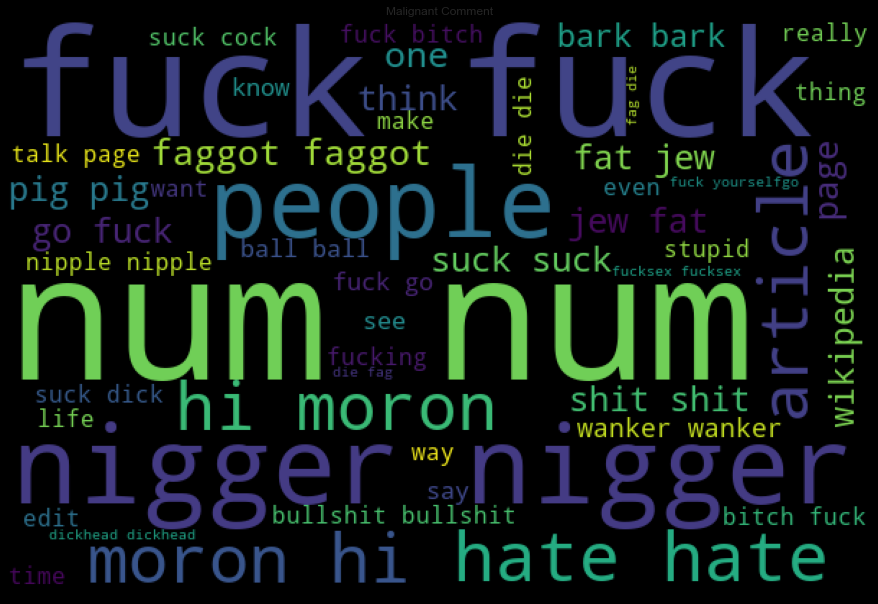

In [52]:
hams =df['comment_text'][df['malignant']==1]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='Malignant Comment')
plt.tight_layout(pad=0)
plt.show()

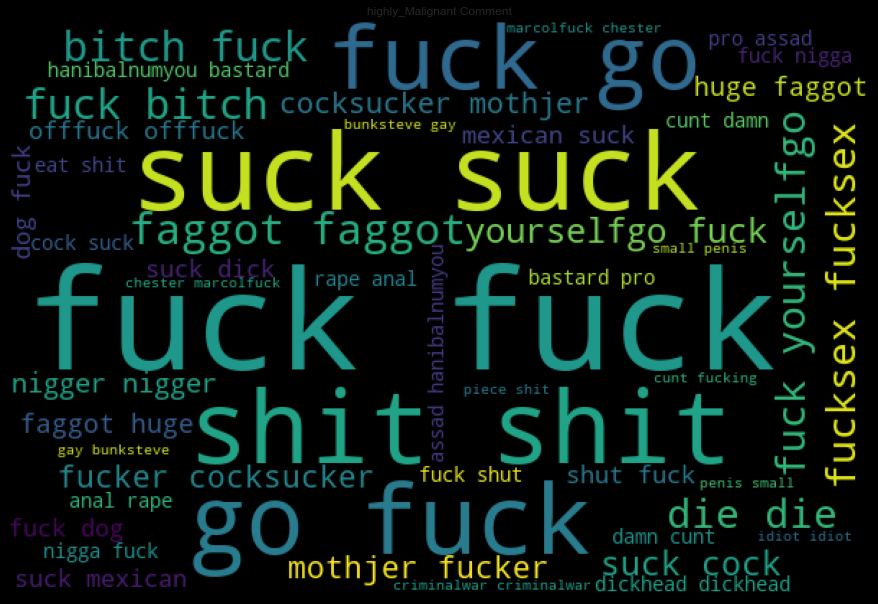

In [53]:
hams =df['comment_text'][df['highly_malignant']==1]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='highly_Malignant Comment')
plt.tight_layout(pad=0)
plt.show()

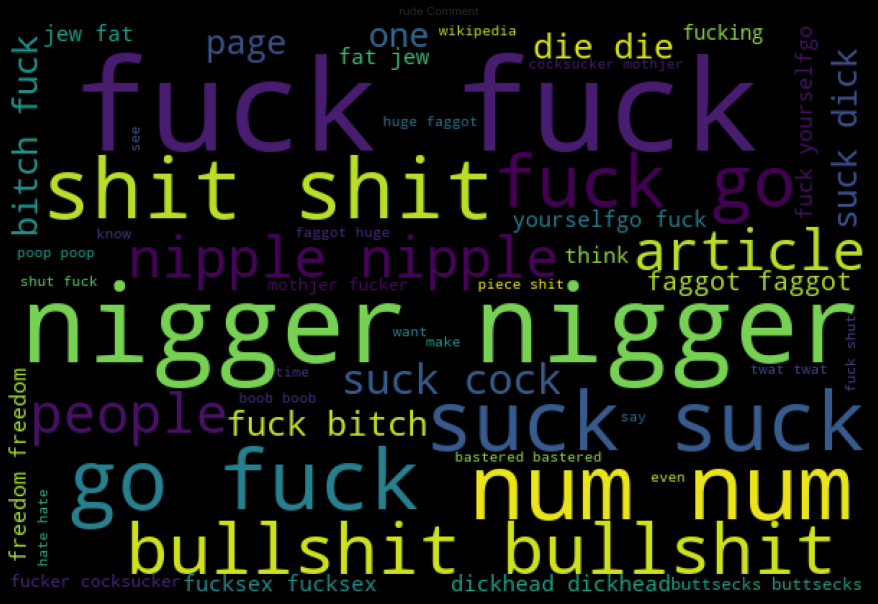

In [54]:
hams =df['comment_text'][df['rude']==1]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='rude Comment')
plt.tight_layout(pad=0)
plt.show()

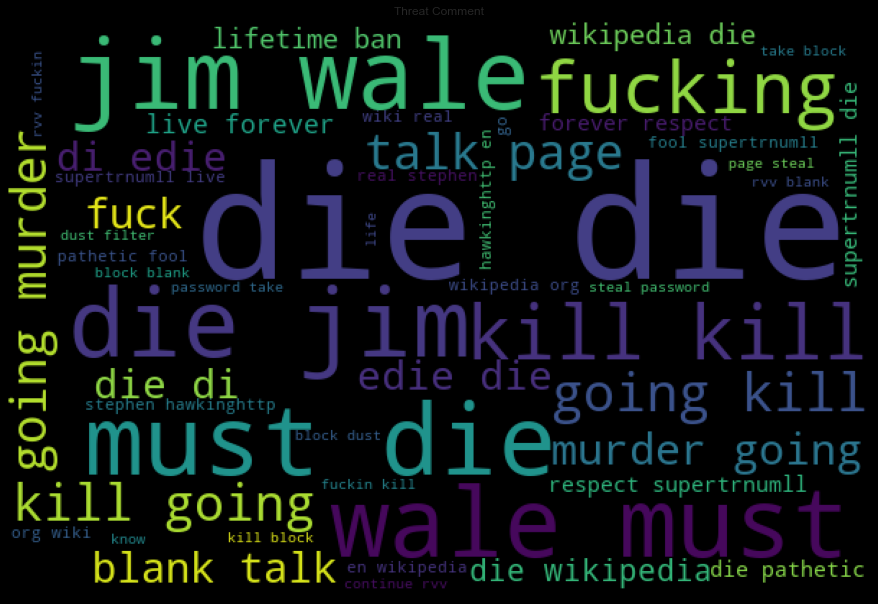

In [55]:
hams =df['comment_text'][df['threat']==1]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='Threat Comment')
plt.tight_layout(pad=0)
plt.show()

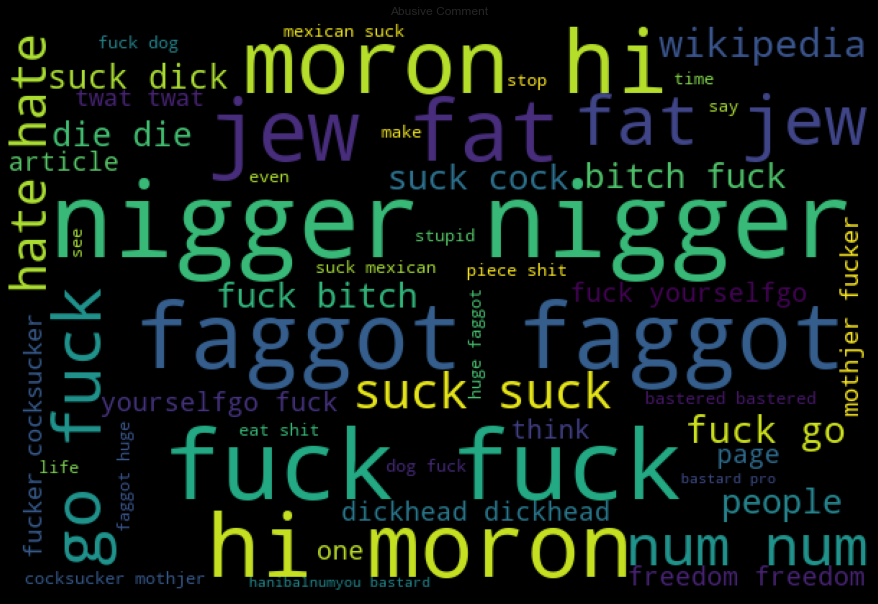

In [56]:
hams =df['comment_text'][df['abuse']==1]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='Abusive Comment')
plt.tight_layout(pad=0)
plt.show()

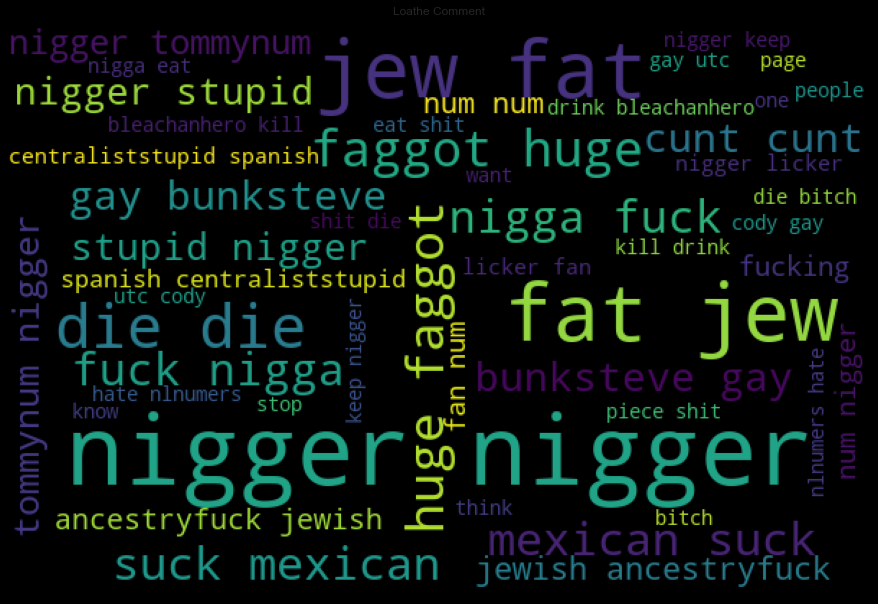

In [57]:
hams =df['comment_text'][df['loathe']==1]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='Loathe Comment')
plt.tight_layout(pad=0)
plt.show()

In [58]:
m = df.iloc[:,1:7].sum()

<AxesSubplot:title={'center':'Malignant comment types and their Counts'}>

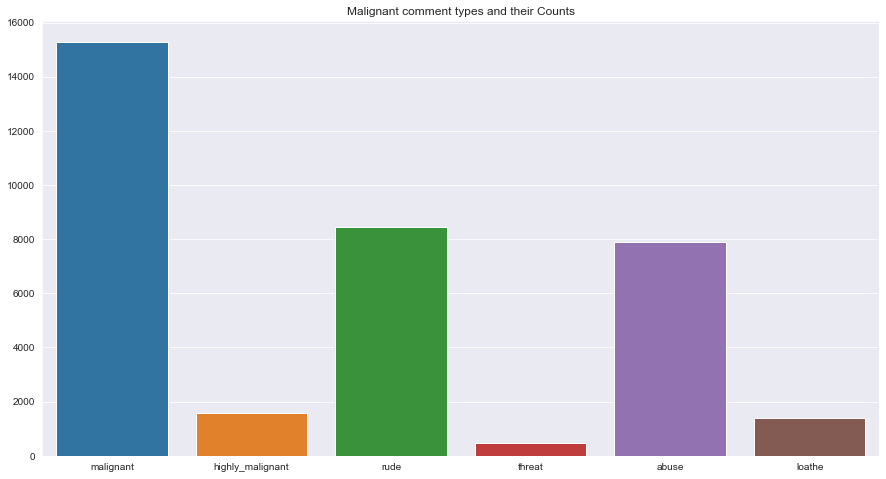

In [59]:
plt.figure(figsize=(15,8),facecolor='white')
plt.title("Malignant comment types and their Counts")
sns.barplot(m.index, m.values)

# Correlation:

In [60]:
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


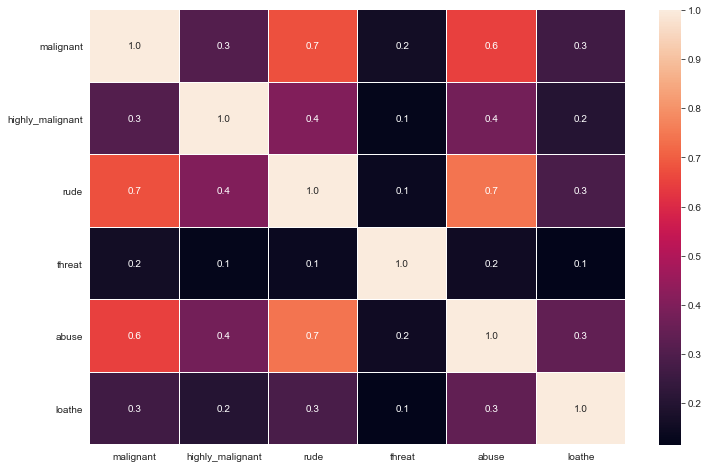

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

### Rude,Abuse, Malignant have highest positive correlation with comment_type

In [62]:
df['comment_type'] = df.iloc[:,1:7].sum(axis=1)

In [63]:
df.comment_type.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: comment_type, dtype: int64

In [64]:
df['comment_type'] = np.where((df['comment_type'] > 0), 1,0)

In [65]:
df['comment_type'].value_counts()

0    143346
1     16225
Name: comment_type, dtype: int64

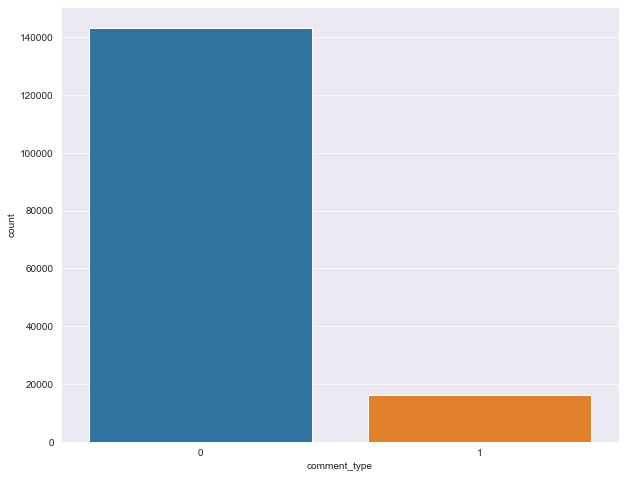

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(df['comment_type'])
plt.show()

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [69]:
features = tf_vec.fit_transform(df['comment_text'])

# Spilting data

In [70]:
X = features
y= df['comment_type']

# Model Building:

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score as cvs
import scikitplot as sktplt
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.corpus import stopwords,wordnet

In [72]:
from sklearn.naive_bayes import MultinomialNB
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X, y,test_size = .30, random_state = i)
    modRF =  MultinomialNB()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9361213235294118 on random_state: 88


#### RandomForestClassifier

In [73]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
RFC.score(x_train,y_train)

0.9994807473656881

In [75]:
pred_rfc = RFC.predict(x_test)

In [76]:
print('Classification Report:',classification_report(y_test, pred_rfc))
print('Confusion Matrix:',confusion_matrix(y_test,pred_rfc))
print('Log_Loss:',log_loss(y_test,pred_rfc))

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43057
           1       0.90      0.63      0.74      4815

    accuracy                           0.96     47872
   macro avg       0.93      0.81      0.86     47872
weighted avg       0.95      0.96      0.95     47872

Confusion Matrix: [[42713   344]
 [ 1779  3036]]
Log_Loss: 1.5317115923276947


#### LogisticRegression

In [77]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [78]:
lr.score(x_train,y_train)

0.9593013366279017

In [79]:
pred_lr = lr.predict(x_test)

In [80]:
print('Classification Report:',classification_report(y_test, pred_lr))
print('Confusion Matrix:',confusion_matrix(y_test,pred_lr))
print('Log_Loss:',log_loss(y_test,pred_lr))

Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98     43057
           1       0.93      0.60      0.73      4815

    accuracy                           0.96     47872
   macro avg       0.95      0.80      0.85     47872
weighted avg       0.95      0.96      0.95     47872

Confusion Matrix: [[42854   203]
 [ 1935  2880]]
Log_Loss: 1.5425314641251127


#### XGBClassifier

In [81]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[21:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
xgb.score(x_train,y_train)

0.9614678734814098

In [83]:
pred_xgb = xgb.predict(x_test)

In [84]:
print('Classification Report:',classification_report(y_test, pred_xgb))
print('Confusion Matrix:',confusion_matrix(y_test,pred_xgb))
print('Log_Loss:',log_loss(y_test,pred_xgb))

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     43057
           1       0.91      0.60      0.72      4815

    accuracy                           0.95     47872
   macro avg       0.93      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872

Confusion Matrix: [[42770   287]
 [ 1943  2872]]
Log_Loss: 1.6089091921188443


#### AdaBoostClassifier

In [85]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [86]:
ad.score(x_train,y_train)

0.9463110681384793

In [87]:
pred_ad = ad.predict(x_test)

In [88]:
print('Classification Report:',classification_report(y_test, pred_ad))
print('Confusion Matrix:',confusion_matrix(y_test,pred_ad))
print('Log_Loss:',log_loss(y_test,pred_ad))

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97     43057
           1       0.88      0.55      0.68      4815

    accuracy                           0.95     47872
   macro avg       0.91      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872

Confusion Matrix: [[42683   374]
 [ 2166  2649]]
Log_Loss: 1.8325700010969266


#### MultinomialNB

In [89]:
mt = MultinomialNB()
mt.fit(x_train,y_train)

MultinomialNB()

In [90]:
mt.score(x_train,y_train)

0.9379940733578636

In [91]:
pred_mt = mt.predict(x_test)

In [92]:
print('Classification Report:',classification_report(y_test, pred_mt))
print('Confusion Matrix:',confusion_matrix(y_test,pred_mt))
print('Log_Loss:',log_loss(y_test,pred_mt))

Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96     43057
           1       0.97      0.36      0.52      4815

    accuracy                           0.93     47872
   macro avg       0.95      0.68      0.74     47872
weighted avg       0.94      0.93      0.92     47872

Confusion Matrix: [[43011    46]
 [ 3086  1729]]
Log_Loss: 2.259681744032881


#### ComplementNB

In [93]:
cp = ComplementNB()
cp.fit(x_train,y_train)

ComplementNB()

In [94]:
cp.score(x_train,y_train)

0.9336520470192213

In [95]:
pred_cp = cp.predict(x_test)

In [96]:
print('Classification Report:',classification_report(y_test, pred_cp))
print('Confusion Matrix:',confusion_matrix(y_test,pred_cp))
print('Log_Loss:',log_loss(y_test,pred_cp))

Classification Report:               precision    recall  f1-score   support

           0       0.97      0.94      0.95     43057
           1       0.57      0.72      0.64      4815

    accuracy                           0.92     47872
   macro avg       0.77      0.83      0.80     47872
weighted avg       0.93      0.92      0.92     47872

Confusion Matrix: [[40488  2569]
 [ 1346  3469]]
Log_Loss: 2.824644129175165


#### PassiveAggressiveClassifie

In [97]:
pac = PassiveAggressiveClassifier()
pac.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [98]:
pac.score(x_train,y_train)

0.9932139052274416

In [99]:
pred_pac = pac.predict(x_test)

In [100]:
print('Classification Report:',classification_report(y_test, pred_pac))
print('Confusion Matrix:',confusion_matrix(y_test,pred_pac))
print('Log_Loss:',log_loss(y_test,pred_pac))

Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97     43057
           1       0.75      0.72      0.74      4815

    accuracy                           0.95     47872
   macro avg       0.86      0.85      0.85     47872
weighted avg       0.95      0.95      0.95     47872

Confusion Matrix: [[41912  1145]
 [ 1347  3468]]
Log_Loss: 1.7979517529072324


# Cross Validation

##### RandomForestClassifier

In [101]:
print(cvs(RFC,X,y,cv=5).mean()) 

0.9560947796694451


##### LogisticRegression

In [102]:
print(cvs(lr,X,y,cv=5).mean()) 

0.9550795534030136


##### XGBClassifier

In [103]:
print(cvs(xgb,X,y,cv=5).mean())

[21:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

##### AdaBoostClassifier

In [104]:
print(cvs(ad,X,y,cv=5).mean())

0.9461618981083729


##### MultinomialNB

In [105]:
print(cvs(mt,X,y,cv=5).mean())

0.9354644618064345


##### ComplementNB

In [106]:
print(cvs(cp,X,y,cv=5).mean())

0.9138878535295945


##### PassiveAggressiveClassifie

In [107]:
print(cvs(pac,X,y,cv=5).mean())

0.948067007318578


# ROC AUC Scores

##### RandomForestClassifier

In [108]:
roc_auc_score(y_test,pred_rfc)

0.8112700928140103

##### LogisticRegression

In [109]:
roc_auc_score(y_test,pred_lr)

0.7967080802908728

##### XGBClassifier

In [110]:
roc_auc_score(y_test,pred_xgb)

0.7949018918653823

##### AdaBoostClassifier

In [111]:
roc_auc_score(y_test,pred_ad)

0.7707348015168186

##### MultinomialNB

In [112]:
roc_auc_score(y_test,pred_mt)

0.6790089188687092

##### ComplementNB

In [113]:
roc_auc_score(y_test,pred_cp)

0.8303959051985739

##### PassiveAggressiveClassifie

In [114]:
roc_auc_score(y_test,pred_pac)

0.8468282824687148

# ROC AUC Curve

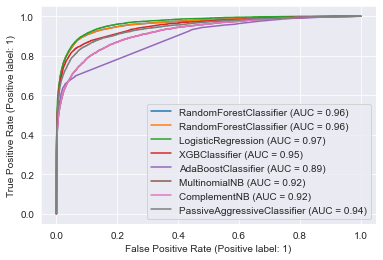

In [115]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [RFC,lr,xgb,ad,mt,cp,pac]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10})

plt.show()

### from above graphs, roc_auc_scores,Precision, Recall, Accuracy Scores with Cross validation scores and log loss scores, it is determined that Random Forest Classifier and LogisticRegression  are the best models for the dataset.

# Hyper Parameter Tuning

#### RandomForestClassifier

In [116]:
params = {'n_estimators':[50,100,300],'max_depth': [10,60],'min_samples_leaf':[2,5,30],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}


In [117]:
GridCV = GridSearchCV(RandomForestClassifier(),params,cv=5,n_jobs = -1,verbose = 1)

In [149]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag', 'newton-cg']},
             verbose=1)

In [150]:
GridCV.best_params_

{'C': 2,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga'}

In [151]:
Best_mod = RandomForestClassifier(n_estimators = 300,criterion = 'gini', max_depth= 60, max_features = 'auto',min_samples_leaf = 2, min_samples_split = 2)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

91.0281584224599


#### Logistic Regression

In [152]:
parameter = {'penalty':['l1', 'l2'],'dual': [True,False],'C':[1,2,5,10],'fit_intercept':[True,False],'solver':['liblinear','saga','sag','newton-cg'],'max_iter':[100,200]}


In [153]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [154]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag', 'newton-cg']},
             verbose=1)

In [155]:
GridCV.best_params_

{'C': 2,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga'}

In [159]:
Best_mod2 = LogisticRegression(penalty = 'l1',dual = False,fit_intercept=False,C=10,solver='liblinear',max_iter=100)
Best_mod2.fit(x_train,y_train)
LRpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,LRpred)
print(acc*100)

94.67538435828877


After Tuning the hyper parameters it is found that Logistic Regression model performs the best.

# Saving The Model

In [160]:
import joblib
joblib.dump(Best_mod2,"MalignantCommentClassifier.pkl")

['MalignantCommentClassifier.pkl']

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Loading Test Data

In [161]:
test_df = pd.read_csv("malignant_test.csv")

In [162]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [163]:
test_df.shape

(153164, 2)

# Data Cleaning

In [164]:
# Convert all messages to lower case
test_df['comment_text'] = test_df['comment_text'].str.lower()

In [165]:
# Replace email addresses with 'email'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [166]:
# Replace URLs with 'webaddress'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [167]:
# Replace money symbols with 'moneysymb' 
test_df['comment_text'] = test_df['comment_text'].str.replace(r'£|\$', 'dollars')

In [168]:
# Replacing 10 digit phone numbers with 'phonenumber'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [169]:
# Replace numbers with 'num'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'\d+(\.\d+)?','num')

In [170]:
#removing punctuations
test_df['comment_text'] = test_df['comment_text'].str.replace(r'[^\w\d\s]',' ')

In [171]:
#removing underscore characters
test_df['comment_text'] = test_df['comment_text'].str.replace(r'[\_]',' ')

In [172]:
#removing single characters
test_df['comment_text'] = test_df['comment_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ')

In [173]:
#removing whitespace between terms with a single space
test_df['comment_text'] = test_df['comment_text'].str.replace(r'\s+', ' ')

In [174]:
#removing leading and trailing whitespace
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+|\s+?$', ' ')

In [175]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [176]:
lem=WordNetLemmatizer()
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [177]:
tf_vector = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [178]:
features = tf_vec.fit_transform(test_df['comment_text'])

In [179]:
test = features

# Loading The Model

In [180]:
model = joblib.load("MalignantCommentClassifier.pkl")

In [181]:
model.predict(test)

array([0, 1, 0, ..., 0, 0, 0])

# Comment Classification 1 means Malignant and 0 means non-malignant

In [182]:
Prediction = pd.DataFrame({'Classification': model.predict(test), 'Comments': test_df['comment_text']})
Prediction

,Classification,Comments
0,0,yo bitch ja rule succesful ever whats hating s...
1,1,rfc title fine imo
2,0,source zawe ashton lapland
3,0,look back source information updated correct f...
4,0,anonymously edit article
...,...,...
153159,0,totally agree stuff nothing long crap
153160,0,throw field home plate get faster throwing cut...
153161,0,okinotorishima category see change agree corre...
153162,0,one founding nation eu germany law return quit...


# Creating Test csv file with predicted Output

In [186]:
Prediction.to_csv("Malignant_finalOuput_test.csv")